In [ ]:
import pandas as pd


# Read the Excel file
file_path = './jugadores.xlsx'
df = pd.read_excel(file_path, sheet_name=None)

frames = []
for name, df in df.items():
    frames.append(df)

raw = pd.concat(frames, ignore_index=True)

# Drop specified columns
columns_to_drop = ['Fase', 'Jornada', 'IdPartido', 'Resultado', 'TITULARES', 'DORSALES']
raw = raw.drop(columns=columns_to_drop)

Mounted at /content/drive


# EDA

In [ ]:
df = raw.copy()
num_instances, num_features = df.shape
print("Number of instances: ", num_instances)
print("Number of features: ", num_features)

Number of instances:  7469
Number of features:  40


In [ ]:
variable_types = df.dtypes
columns = df.columns
missing_values = df.isnull().sum()
print("Tipos de variables:")
for i in range(len(variable_types)):
    if variable_types[i] in ['float64', 'int64']:
        print(columns[i], ": ", variable_types[i], "-> numérico. || Missing values: ", missing_values[i])
    else:
        print(columns[i], ": ", variable_types[i], "-> categórico. || Missing values: ", missing_values[i])

Tipos de variables:
IdEquipo :  int64 -> numérico. || Missing values:  0
Local :  object -> categórico. || Missing values:  0
Rival :  object -> categórico. || Missing values:  0
JUGADOR :  object -> categórico. || Missing values:  0
MINUTOS JUGADOS :  float64 -> numérico. || Missing values:  0
PUNTOS :  int64 -> numérico. || Missing values:  0
T2 CONVERTIDO :  int64 -> numérico. || Missing values:  0
T2 INTENTADO :  int64 -> numérico. || Missing values:  0
T3 CONVERTIDO :  int64 -> numérico. || Missing values:  0
T3 INTENTADO :  int64 -> numérico. || Missing values:  0
TL CONVERTIDOS :  int64 -> numérico. || Missing values:  0
TL INTENTADOS :  int64 -> numérico. || Missing values:  0
REB OFFENSIVO :  int64 -> numérico. || Missing values:  0
REB DEFENSIVO :  int64 -> numérico. || Missing values:  0
ASISTENCIAS :  int64 -> numérico. || Missing values:  0
RECUPEROS :  int64 -> numérico. || Missing values:  0
PERDIDAS :  int64 -> numérico. || Missing values:  0
FaltasCOMETIDAS :  int64 ->

/tmp/ipython-input-3-3173518943.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if variable_types[i] in ['float64', 'int64']:
/tmp/ipython-input-3-3173518943.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(columns[i], ": ", variable_types[i], "-> numérico. || Missing values: ", missing_values[i])
/tmp/ipython-input-3-3173518943.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(columns[i], ": ", variable_types[i

In [ ]:
print(df.columns)
import pandas as pd

# Diccionario actualizado con 'Recuperos' como 'ROB'
renombrado = {
    'MINUTOS JUGADOS': 'Min',
    'PUNTOS': 'Puntos',
    'T2 CONVERTIDO': 'T2C',
    'T2 INTENTADO': 'T2I',
    'T3 CONVERTIDO': 'T3C',
    'T3 INTENTADO': 'T3I',
    'TL CONVERTIDOS': 'T1C',
    'TL INTENTADOS': 'T1I',
    'REB OFFENSIVO': 'RO',
    'REB DEFENSIVO': 'RD',
    'ASISTENCIAS': 'AS',
    'RECUPEROS': 'ROB',
    'PERDIDAS': 'PP',
    'FaltasCOMETIDAS': 'FC',
    'FaltasRECIBIDAS': 'FR',
    'PLAYS': 'Plays',
    'PTS POR PLAYS': 'PPP',
    'TCConvertido': 'TCC',
    'TCIntentado': 'TCI',
    'EFG%': 'eFG%',
    'TS%': 'TS%',
    'TO%': 'TO%',
    'Ratio TL': 'RTL%',
    'Produccion x cada TL Intentado': 'PPT1',
    '% pts por jugada viene de T1': 'PPPT1',
    'Produccion x cada T2 Intentado': 'PPT2',
    '%PTS X jugada viene TC2': 'PPPT2',
    'Produccion x cada T3 Intentado': 'PPT3',
    '%PTS Xjugada viene TC3': 'PPPT3',
    '%PLAYS termina en T1': 'F1 Plays%',
    '%PLAYS termina en T2': 'F2 Plays%',
    '%PLAYS termina en T3': 'F3 Plays%',
    '%PLAYS termina en PERDIDA': 'PP Plays%',
    'OE': 'OE',
    'Puntos Eficientes a partir de volumen anotador': 'EPS',
    'Asistencia Por Plays': 'AS%',
}

# Aplicación al DataFrame
df = df.rename(columns=renombrado)

print(df.columns)

Index(['IdEquipo', 'Local', 'Rival', 'JUGADOR', 'MINUTOS JUGADOS', 'PUNTOS',
       'T2 CONVERTIDO', 'T2 INTENTADO', 'T3 CONVERTIDO', 'T3 INTENTADO',
       'TL CONVERTIDOS', 'TL INTENTADOS', 'REB OFFENSIVO', 'REB DEFENSIVO',
       'ASISTENCIAS', 'RECUPEROS', 'PERDIDAS', 'FaltasCOMETIDAS',
       'FaltasRECIBIDAS', 'PLAYS', 'PTS POR PLAYS', 'TCConvertido',
       'TCIntentado', 'EFG%', 'TS%', 'TO%', 'Ratio TL',
       'Produccion x cada TL Intentado', '% pts por jugada viene de T1',
       'Produccion x cada T2 Intentado', '%PTS X jugada viene TC2',
       'Produccion x cada T3 Intentado', '%PTS Xjugada viene TC3',
       '%PLAYS termina en T1', '%PLAYS termina en T2',
       '%PLAYS termina en PERDIDA', '%PLAYS termina en T3', 'OE',
       'Puntos Eficientes a partir de volumen anotador',
       'Asistencia Por Plays'],
      dtype='object')
Index(['IdEquipo', 'Local', 'Rival', 'JUGADOR', 'Min', 'Puntos', 'T2C', 'T2I',
       'T3C', 'T3I', 'T1C', 'T1I', 'RO', 'RD', 'AS', 'ROB', 'PP',

In [ ]:
columns_to_drop_after_rename = [
    'Plays', 'PPP', 'TCC', 'TCI', 'eFG%', 'TS%', 'TO%', 'RTL%',
    'PPT1', 'PPPT1', 'PPT2', 'PPPT2', 'PPT3', 'PPPT3',
    'F1 Plays%', 'F2 Plays%', 'PP Plays%', 'F3 Plays%', 'OE',
    'EPS', 'AS%'
]

df = df.drop(columns=columns_to_drop_after_rename)

print("Columns remaining in DataFrame:")
print(df.columns)

Columns remaining in DataFrame:
Index(['IdEquipo', 'Local', 'Rival', 'JUGADOR', 'Min', 'Puntos', 'T2C', 'T2I',
       'T3C', 'T3I', 'T1C', 'T1I', 'RO', 'RD', 'AS', 'ROB', 'PP', 'FC', 'FR'],
      dtype='object')


In [ ]:
variable_types = df.dtypes
columns = df.columns
missing_values = df.isnull().sum()
print("Tipos de variables:")
for i in range(len(variable_types)):
    if variable_types[i] in ['float64', 'int64']:
        print(columns[i], ": ", variable_types[i], "-> numérico. || Missing values: ", missing_values[i])
    else:
        print(columns[i], ": ", variable_types[i], "-> categórico. || Missing values: ", missing_values[i])

Tipos de variables:
IdEquipo :  int64 -> numérico. || Missing values:  0
Local :  object -> categórico. || Missing values:  0
Rival :  object -> categórico. || Missing values:  0
JUGADOR :  object -> categórico. || Missing values:  0
Min :  float64 -> numérico. || Missing values:  0
Puntos :  int64 -> numérico. || Missing values:  0
T2C :  int64 -> numérico. || Missing values:  0
T2I :  int64 -> numérico. || Missing values:  0
T3C :  int64 -> numérico. || Missing values:  0
T3I :  int64 -> numérico. || Missing values:  0
T1C :  int64 -> numérico. || Missing values:  0
T1I :  int64 -> numérico. || Missing values:  0
RO :  int64 -> numérico. || Missing values:  0
RD :  int64 -> numérico. || Missing values:  0
AS :  int64 -> numérico. || Missing values:  0
ROB :  int64 -> numérico. || Missing values:  0
PP :  int64 -> numérico. || Missing values:  0
FC :  int64 -> numérico. || Missing values:  0
FR :  int64 -> numérico. || Missing values:  0


/tmp/ipython-input-6-3173518943.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if variable_types[i] in ['float64', 'int64']:
/tmp/ipython-input-6-3173518943.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(columns[i], ": ", variable_types[i], "-> numérico. || Missing values: ", missing_values[i])
/tmp/ipython-input-6-3173518943.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(columns[i], ": ", variable_types[i

In [ ]:
for col in df.columns:
    print(f"Column: {col}")
    print(f"Min value: {df[col].min()}")
    print(f"Max value: {df[col].max()}")
    print("-" * 30)

Column: IdEquipo
Min value: 0
Max value: 1
------------------------------
Column: Local
Min value: BALONCESTO ALCALA
Max value: ZENTRO BASKET MADRID
------------------------------
Column: Rival
Min value: BALONCESTO ALCALA
Max value: ZENTRO BASKET MADRID
------------------------------
Column: JUGADOR
Min value: ABITBOL VIERA, MARIO
Max value: ZURITA RUEDA, MARCOS
------------------------------
Column: Min
Min value: 0.01666666666666667
Max value: 42.33333333333334
------------------------------
Column: Puntos
Min value: 0
Max value: 36
------------------------------
Column: T2C
Min value: 0
Max value: 13
------------------------------
Column: T2I
Min value: 0
Max value: 20
------------------------------
Column: T3C
Min value: 0
Max value: 8
------------------------------
Column: T3I
Min value: 0
Max value: 16
------------------------------
Column: T1C
Min value: 0
Max value: 19
------------------------------
Column: T1I
Min value: 0
Max value: 23
------------------------------
Column: 

In [ ]:
# Mostrar columnas con valores faltantes
print("Columnas con valores faltantes:")
if missing_values.sum() == 0:
    print("No hay columnas con valores faltantes")
else:
    for col in columns:
        if missing_values[col] > 0:
            print(col, ": ", missing_values[col])

# Columnas constantes
constant_columns = df.columns[df.nunique() == 1]
print("Columnas constantes:")
if len(constant_columns) == 0:
    print("No hay columnas constantes")
else:
    for col in constant_columns:
        print(col)

# Filas duplicadas
duplicated_rows = df.duplicated()
print("Filas duplicadas: ", duplicated_rows.sum())

# Filas vacías
empty_rows = df.isnull().all(axis=1)
print("Filas vacías: ", empty_rows.sum())

Columnas con valores faltantes:
No hay columnas con valores faltantes
Columnas constantes:
No hay columnas constantes
Filas duplicadas:  0
Filas vacías:  0


In [ ]:
print(df.columns)

Index(['IdEquipo', 'Local', 'Rival', 'JUGADOR', 'Min', 'Puntos', 'T2C', 'T2I',
       'T3C', 'T3I', 'T1C', 'T1I', 'RO', 'RD', 'AS', 'ROB', 'PP', 'FC', 'FR'],
      dtype='object')


In [ ]:
num_cols = ['Puntos','T2C','T2I','T3C','T3I','T1C','T1I','RO','RD',
            'AS','ROB','PP','FC','FR']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
print(df.columns)

Index(['IdEquipo', 'Local', 'Rival', 'JUGADOR', 'Min', 'Puntos', 'T2C', 'T2I',
       'T3C', 'T3I', 'T1C', 'T1I', 'RO', 'RD', 'AS', 'ROB', 'PP', 'FC', 'FR'],
      dtype='object')


In [ ]:
# --- 3. AGGREGATE TO SEASON LINE ------------------------------------------ #
g = df.groupby('JUGADOR', as_index=False).agg(
        {c: 'sum' for c in num_cols}    # sum all your numeric cols…
        | {'Min': 'sum'}                # …and sum Min…
        | {'Local': 'first'}            # …but take the first Local
    )      # totals

# --- 3b. ADD GAME COUNT & FILTER < 6 GAMES ---------------------- #
g['G'] = df.groupby('JUGADOR').size().values   # number of rows per player

g = g[g['G'] >= 6].reset_index(drop=True)      # keep only ≥ 6 games

# helper: per‑100 plays
per100 = lambda x,y: (x / y.replace(0, pd.NA))

g['Min%']      = g['Min'] / g['G']
g['Plays']     = g['T1I']*0.44 + g['T2I'] + g['T3I'] + g['PP']
g['PPP']       = per100(g['Puntos'], g['Plays'])
g['RO_100']    = per100(g['RO'],     g['Plays'])
g['RD_100']    = per100(g['RD'],     g['Plays'])
g['AS_100']    = per100(g['AS'],     g['Plays'])
g['ROB_100']   = per100(g['ROB'],    g['Plays'])
g['TO_100']    = per100(g['PP'],     g['Plays'])
g['FC_100']    = per100(g['FC'],     g['Plays'])
g['FR_100']    = per100(g['FR'],     g['Plays'])
g['TCC']       = g['T2C'] + g['T3C']
g['TCI']       = g['T2I'] + g['T3I']


# --- 4. ADVANCED METRICS FROM TOTALS ----- #
g['eFG']  = g['TCC'] + 0.5*g['T3C'] / g['TCI'].replace(0, pd.NA)
g['TS']   = g['Puntos'] / (2 * (g['TCI'] + 0.44 * g['T1I']).replace(0,pd.NA))

g['RTL'] = g['T1I'] / g['Plays'].replace(0, pd.NA)

g['PPT1'] = g['T1C'] / g['T1I'].replace(0, pd.NA)
g['PPT2'] = g['T2C']*2 / g['T2I'].replace(0, pd.NA)
g['PPT3'] = g['T3C']*3 / g['T3I'].replace(0, pd.NA)

g['PPPT1']   = (g['T1C'] / g['Plays'].replace(0, pd.NA)) / g['PPP'].replace(0, pd.NA)
g['PPPT2']   = (g['T2C']*2 / g['Plays'].replace(0, pd.NA)) / g['PPP'].replace(0, pd.NA)
g['PPPT3']   = (g['T3C']*3 / g['Plays'].replace(0, pd.NA)) / g['PPP'].replace(0, pd.NA)

g['F1 Plays%'] = g['T1I']*0.44 / g['Plays'].replace(0, pd.NA)
g['F2 Plays%'] = g['T2I'] / g['Plays'].replace(0, pd.NA)
g['F3 Plays%'] = g['T3I'] / g['Plays'].replace(0, pd.NA)
g['PP Plays%'] = g['PP'] / g['Plays'].replace(0, pd.NA)

g['PS%'] = (((g['TCC'] + (1 - (1 - g['T1C']/g['T1I'])**2)*0.44*g['T1I']).where(g['TCC']!=0, 0)
             / g['Plays']).fillna(0))
g['OE']   = (g['TCC'] + g['AS']) / (g['TCI'] - g['RO'] + g['AS'] + g['PP']).replace(0, pd.NA)
g['EPS']  = g['Puntos'] * g['OE']

g = g.fillna(0)

print(g.shape)

(362, 46)


/tmp/ipython-input-11-32982072.py:54: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  g = g.fillna(0)


In [ ]:
# 1. Load your player‐season DataFrame `g` (from your existing aggregation code)
#    and the team‐games file from Drive:
equipos_file = "/content/drive/MyDrive/equipos.xlsx"
team_sheets = ["EBA BB Totals", "EBA BA Totals"]

# 2. Build a single DataFrame of season‐long team totals:
team_totals_list = []
for sheet in team_sheets:
    df_team = pd.read_excel(equipos_file, sheet_name=sheet)
    # sum across all games per team
    agg = (
        df_team
        .groupby(["Local"], as_index=False)
        .agg({
            "MINUTOS JUGADOS": "sum",
            "T2 INTENTADO":   "sum",
            "T3 INTENTADO":   "sum",
            "TL INTENTADOS":  "sum",
            "PERDIDAS":       "sum",
        })
        .rename(columns={
            "MINUTOS JUGADOS": "team_MP",
            "T2 INTENTADO":    "team_T2I",
            "T3 INTENTADO":    "team_T3I",
            "TL INTENTADOS":   "team_FTA",
            "PERDIDAS":        "team_TOV",
        })
    )
    # possessions components
    agg["team_FGA"] = agg["team_T2I"] + agg["team_T3I"]
    team_totals_list.append(agg)

team_totals = pd.concat(team_totals_list, ignore_index=True)

print(team_totals.head(1))

# 3. Merge season team totals into your player‐season DataFrame `g`
g = g.merge(
    team_totals[["Local","team_MP","team_FGA","team_FTA","team_TOV"]],
    on=["Local"],
    how="left"
)

# 4. Compute season USG%
#    player_FGA = T2I + T3I
#    player_FTA = T1I
#    player_TOV = PP
num = ( (g["T2I"] + g["T3I"]) + 0.44 * g["T1I"] + g["PP"] ) * (g["team_MP"] / 5)
den = g["Min"] * ( g["team_FGA"] + 0.44 * g["team_FTA"] + g["team_TOV"] )
g["USG%"] = num / den

# 5. (Optional) fill NaNs or format
g["USG%"] = g["USG%"].fillna(0)

# 6. Now `g` has a new column `USG%` with each player's season usage percentage.


         Local  team_MP  team_T2I  team_T3I  team_FTA  team_TOV  team_FGA
0  C.B. GETAFE     5250       878       873       434       350      1751


In [ ]:
# Show for FROLOV, ILIA == JUGADOR
print(g[g['JUGADOR'] == 'FROLOV, ILIA'].iloc[0].to_dict())

{'JUGADOR': 'FROLOV, ILIA', 'Puntos': 163, 'T2C': 52, 'T2I': 97, 'T3C': 9, 'T3I': 36, 'T1C': 32, 'T1I': 52, 'RO': 52, 'RD': 99, 'AS': 21, 'ROB': 13, 'PP': 32, 'FC': 32, 'FR': 46, 'Min': 388.3666666666667, 'Local': 'REAL MADRID', 'G': 19, 'Min%': 20.440350877192984, 'Plays': 187.88, 'PPP': 0.8675750479029167, 'RO_100': 0.2767724079199489, 'RD_100': 0.5269320843091335, 'AS_100': 0.11177347242921014, 'ROB_100': 0.06919310197998722, 'TO_100': 0.17032148179689163, 'FC_100': 0.17032148179689163, 'FR_100': 0.24483713008303173, 'TCC': 61, 'TCI': 133, 'eFG': 61.03383458646616, 'TS': 0.5228380805748012, 'RTL': 0.2767724079199489, 'PPT1': 0.6153846153846154, 'PPT2': 1.0721649484536082, 'PPT3': 0.75, 'PPPT1': 0.19631901840490798, 'PPPT2': 0.6380368098159509, 'PPPT3': 0.1656441717791411, 'F1 Plays%': 0.12177985948477751, 'F2 Plays%': 0.5162869916968278, 'F3 Plays%': 0.1916116670215031, 'PP Plays%': 0.17032148179689163, 'PS%': 0.4284404120469694, 'OE': 0.6119402985074627, 'EPS': 99.74626865671641, '

In [ ]:
# Top three players per USG and pero PS%
top_usg = g.sort_values('USG%', ascending=False).head(3)
top_ps = g.sort_values('PS%', ascending=False).head(3)

print("Top three players per USG:")
print(top_usg[['JUGADOR', 'USG%']])

print("\nTop three players per PS%:")
print(top_ps[['JUGADOR', 'PS%']])

Top three players per USG:
                              JUGADOR      USG%
175                     KRISPIN, LIAM  0.323889
160              HUELVES GARCIA, ANDY  0.316657
134  GONZALEZ CAMEJO, EUDALDO IMOBACH  0.309766

Top three players per PS%:
                    JUGADOR       PS%
250  PARADELA PARIS, SERGIO  0.623482
178     LANDOURE, MAHAMADOU  0.621661
201   MARCIEL, ERIC RICHARD  0.545343


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

feature_cols = [
    # scoring & efficiency
    'PPP','eFG','TS', 'OE', 'EPS', 'USG%', 'PS%', 'RTL',
    'F1 Plays%','F2 Plays%','F3 Plays%','PP Plays%',
    'PPPT1','PPPT2','PPPT3',
    'PPT1', 'PPT2', 'PPT3',
    # playmaking & ball‑security
    'AS_100','TO_100',
    # rebounding & steals
    'RO_100','RD_100','ROB_100',
    # discipline (faltas cometidas y recibidas)
    'FC_100','FR_100'
]

df_feats = g[feature_cols].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1) Scale your features
scaler = StandardScaler()
X_std = scaler.fit_transform(df_feats)

# 2) Run PCA to capture ~90% of the variance
pca = PCA(n_components=0.90, random_state=0)
X_pca = pca.fit_transform(X_std)

print("X_pca shape:", X_pca.shape)

X_pca shape: (362, 7)


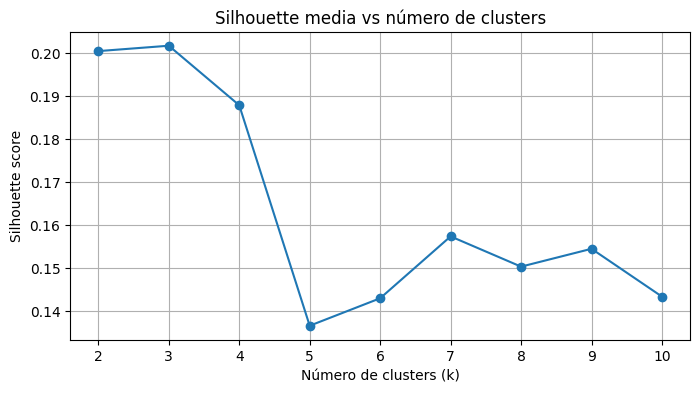

▶ k óptimo según silhouette: 3


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Rango de k a probar
ks = range(2, 11)
sil_scores = []

for k in ks:
    labels = KMeans(n_clusters=k, random_state=0).fit_predict(X_pca)
    sil = silhouette_score(X_pca, labels)
    sil_scores.append(sil)

# Gráfica
plt.figure(figsize=(8,4))
plt.plot(ks, sil_scores, marker='o')
plt.xticks(ks)
plt.title("Silhouette media vs número de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette score")
plt.grid(True)
plt.show()

best_k = ks[sil_scores.index(max(sil_scores))]
print(f"▶ k óptimo según silhouette: {best_k}")


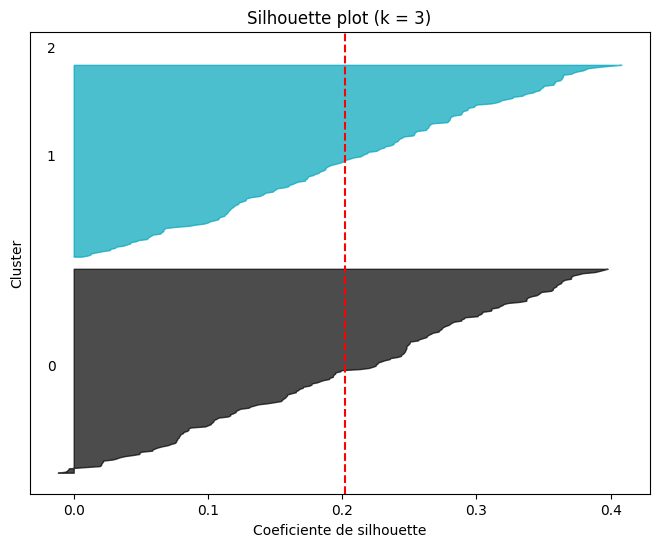

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt

# Usa el k que detectamos arriba
labels = KMeans(n_clusters=best_k, random_state=0).fit_predict(X_pca)
sil_vals = silhouette_samples(X_pca, labels)

fig, ax = plt.subplots(figsize=(8,6))
y_lower = 10

for i in range(best_k):
    # Ordenamos los valores de silueta de ese cluster
    c_sil = np.sort(sil_vals[labels == i])
    size = c_sil.shape[0]
    y_upper = y_lower + size

    color = plt.cm.nipy_spectral(i / best_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, c_sil,
                     facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.02, y_lower + 0.5 * size, str(i))
    y_lower = y_upper + 10  # espacio entre clusters

ax.set_title(f"Silhouette plot (k = {best_k})")
ax.set_xlabel("Coeficiente de silhouette")
ax.set_ylabel("Cluster")
ax.axvline(x=silhouette_score(X_pca, labels), color="red", linestyle="--")
ax.set_yticks([])
plt.show()


In [ ]:
# 1) Escalado + PCA (vuelvo a incluir por si falta)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_std = scaler.fit_transform(df_feats)

pca = PCA(n_components=0.90, random_state=0)
X_pca = pca.fit_transform(X_std)

# 2) UMAP a 2 dimensiones
import umap
umap2d = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=0)
X_2d   = umap2d.fit_transform(X_pca)

# 3) Añade las coordenadas al DataFrame g
g['UMAP1'] = X_2d[:,0]
g['UMAP2'] = X_2d[:,1]

print("UMAP1/UMAP2 añadidas. Primeros 5 valores:")
print(g[['UMAP1','UMAP2']].head())


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP1/UMAP2 añadidas. Primeros 5 valores:
      UMAP1     UMAP2
0  3.657148  4.565655
1  6.316878  0.570999
2  4.577855  4.236728
3  7.345784  2.418749
4  4.139880 -0.178021


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

def evaluate(labels, X):
    # filtra puntos “ruidosos” si DBSCAN devuelve -1
    mask = labels != -1
    if len(np.unique(labels[mask])) < 2:
        return {'sil': np.nan, 'db': np.nan, 'ch': np.nan}
    return {
      'sil': silhouette_score(X[mask], labels[mask]),
      'db':  davies_bouldin_score(X[mask], labels[mask]),
      'ch':  calinski_harabasz_score(X[mask], labels[mask])
    }

results = []

# 1) KMeans para distintos k
for k in [2,3,4,5]:
    lbl = KMeans(n_clusters=k, random_state=0).fit_predict(X_pca)
    res = evaluate(lbl, X_pca)
    res.update({'method':'KMeans','param':k})
    results.append(res)

# 2) Jerárquico (ward linkage) para los mismos k
for k in [2,3,4,5]:
    lbl = AgglomerativeClustering(n_clusters=k, linkage='ward').fit_predict(X_pca)
    res = evaluate(lbl, X_pca)
    res.update({'method':'Hierarchical','param':k})
    results.append(res)

# 3) DBSCAN barrido rápido
for eps in [0.5, 1.0, 1.5, 2.0]:
    for ms in [5, 10, 15]:
        lbl = DBSCAN(eps=eps, min_samples=ms).fit_predict(X_pca)
        res = evaluate(lbl, X_pca)
        res.update({'method':'DBSCAN', 'param':f'eps={eps},ms={ms}'})
        results.append(res)

import pandas as pd
df_eval = pd.DataFrame(results)
print(df_eval.sort_values('sil', ascending=False).head(10))
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

def evaluate(labels, X):
    # filtra puntos “ruidosos” si DBSCAN devuelve -1
    mask = labels != -1
    if len(np.unique(labels[mask])) < 2:
        return {'sil': np.nan, 'db': np.nan, 'ch': np.nan}
    return {
      'sil': silhouette_score(X[mask], labels[mask]),
      'db':  davies_bouldin_score(X[mask], labels[mask]),
      'ch':  calinski_harabasz_score(X[mask], labels[mask])
    }

results = []

# 1) KMeans para distintos k
for k in [2,3,4,5]:
    lbl = KMeans(n_clusters=k, random_state=0).fit_predict(X_pca)
    res = evaluate(lbl, X_pca)
    res.update({'method':'KMeans','param':k})
    results.append(res)

# 2) Jerárquico (ward linkage) para los mismos k
for k in [2,3,4,5]:
    lbl = AgglomerativeClustering(n_clusters=k, linkage='ward').fit_predict(X_pca)
    res = evaluate(lbl, X_pca)
    res.update({'method':'Hierarchical','param':k})
    results.append(res)

# 3) DBSCAN barrido rápido
for eps in [0.5, 1.0, 1.5, 2.0]:
    for ms in [5, 10, 15]:
        lbl = DBSCAN(eps=eps, min_samples=ms).fit_predict(X_pca)
        res = evaluate(lbl, X_pca)
        res.update({'method':'DBSCAN', 'param':f'eps={eps},ms={ms}'})
        results.append(res)

import pandas as pd
df_eval = pd.DataFrame(results)
print(df_eval.sort_values('sil', ascending=False).head(10))


         sil        db         ch        method          param
15  0.258514  1.189913  30.280178        DBSCAN  eps=1.5,ms=10
4   0.228694  1.815091  76.969669  Hierarchical              2
1   0.201782  1.223088  56.961297        KMeans              3
0   0.200529  1.749793  92.357490        KMeans              2
2   0.187924  1.205214  67.423239        KMeans              4
6   0.166687  1.563748  70.427862  Hierarchical              4
7   0.162077  1.649072  63.086019  Hierarchical              5
5   0.150530  1.745142  73.315084  Hierarchical              3
3   0.136599  1.344770  62.510067        KMeans              5
14  0.112592  0.911669   8.379169        DBSCAN   eps=1.5,ms=5
         sil        db         ch        method          param
15  0.258514  1.189913  30.280178        DBSCAN  eps=1.5,ms=10
4   0.228694  1.815091  76.969669  Hierarchical              2
1   0.201782  1.223088  56.961297        KMeans              3
0   0.200529  1.749793  92.357490        KMeans        

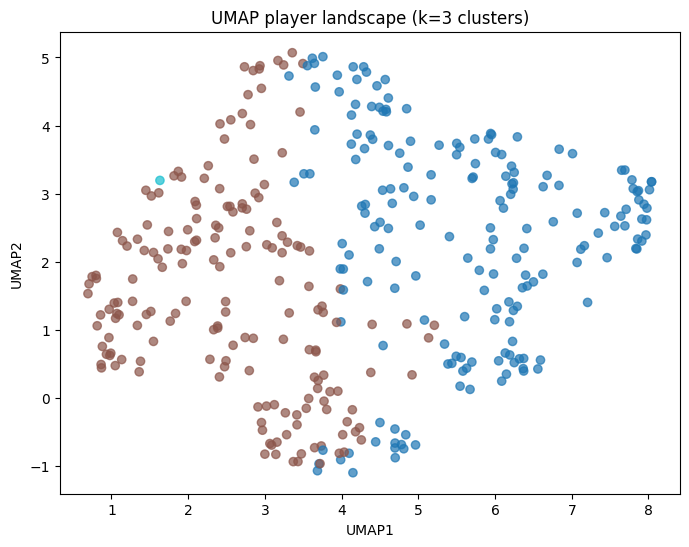

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Cluster with k = best_k computed before
# best_k = editable
g['ROLE'] = KMeans(n_clusters=best_k, random_state=0) \
                .fit_predict(X_pca)

# 2. Plot UMAP colored by the 2 clusters
plt.figure(figsize=(8,6))
plt.scatter(g['UMAP1'], g['UMAP2'], c=g['ROLE'], cmap='tab10', alpha=0.7)
plt.title("UMAP player landscape (k=3 clusters)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# — 1) Cluster centroids in PCA‑space  —
kmeans = KMeans(n_clusters=best_k, random_state=0).fit(X_pca)
centroids = kmeans.cluster_centers_

# — 2) Compute feature‑means per ROLE  —
cluster_means = g.groupby('ROLE')[feature_cols].mean()
print("Average stats per cluster:")
print(cluster_means)

# — 3) Find the prototype (nearest to centroid) for each ROLE  —
prototypes = []
for role in range(best_k):
    # distances from every point in that role to the centroid
    idxs = np.where(g['ROLE']==role)[0]
    dists = np.linalg.norm(X_pca[idxs] - centroids[role], axis=1)
    # pick the player with minimum distance
    prot_idx = idxs[np.argmin(dists)]
    prototypes.append({
        'ROLE': role,
        'PLAYER': g.at[prot_idx, 'JUGADOR'],
        **{col: g.at[prot_idx, col] for col in feature_cols}
    })

prototypes_df = pd.DataFrame(prototypes).set_index('ROLE')
print("\nPrototype player per cluster:")
print(prototypes_df)


Average stats per cluster:
           PPP        eFG        TS        OE        EPS      USG%       PS%  \
ROLE                                                                           
0     0.859089  56.182163  0.522455  0.637948  86.208945  0.183323  0.438082   
1     0.848227  64.335440  0.499347  0.467286  87.092651  0.207676  0.374123   
2     0.585667  14.186808  0.391308  0.425490  17.760113  0.141634  0.225021   

           RTL  F1 Plays%  F2 Plays%  ...      PPT1      PPT2      PPT3  \
ROLE                                  ...                                 
0     0.303898   0.133715   0.593292  ...  0.557174  1.060756  0.505818   
1     0.201605   0.088706   0.376485  ...  0.693743  0.924219  0.914780   
2     0.171316   0.075379   0.363245  ...  0.441597  0.758040  0.552781   

        AS_100    TO_100    RO_100    RD_100   ROB_100    FC_100    FR_100  
ROLE                                                                        
0     0.109620  0.176972  0.232875  0.4059

In [ ]:
# 4) Configura tus pesos por cluster (ajusta valores según prioridad)
weights_by_role = {
    0: {   # “Interior”
        'F2 Plays%':  0.25,   # mid‑range volume
        'PPT2':       0.20,   # eficiencia en T2
        'PS%':        0.15,   # % jugadas acabadas en puntos
        'OE':         0.10,   # creación eficiente
        'RO_100':     0.15,   # rebote ofensivo
        'RD_100':     0.10,   # rebote defensivo
        'USG%':       0.05,   # uso ligero como peso
       'TO_100':      -0.10    # penaliza pérdidas
    },
    1: {   # “Tirador”
        'F3 Plays%':  0.30,   # volumen de triples
        'PPT3':       0.25,   # eficiencia en T3
        'eFG':        0.15,   # eficiencia global
        'PS%':        0.10,   # % jugadas acabadas en puntos
        'USG%':       0.15,   # uso moderado relevante
        'EPS':        0.10,   # producción total
        'TO_100':    -0.10    # pérdidas
    },
    2: {   # “Manejador”
        'AS_100':     0.25,   # asistencias per‑100
        'PS%':        0.20,   # eficiencia en generar puntos
        'USG%':       0.05,   # apenas peso aquí
        'ROB_100':    0.10,   # robos per‑100
        'FR_100':     0.10,   # faltas recibidas
        'EPS':        0.10,   # producción total
        'OE':         0.05,   # eficiencia de creación
       'TO_100':    -0.20,   # penaliza pérdidas elevadas
       'FC_100':    -0.05    # penaliza faltas cometidas
    }
}

# 5) Calcula COMPOSITE
def compute_composite(row):
    w = weights_by_role[row['ROLE']]
    return sum(row[feat] * weight for feat, weight in w.items())

g['COMPOSITE'] = g.apply(compute_composite, axis=1)

# 6) Top‑5 vecinos “similares y mejores”
from sklearn.metrics.pairwise import cosine_distances

# recalcula distancias en el espacio PCA
dist = cosine_distances(X_pca)

def top_replacements(player_name, k=5):
    idx = g.index[g['JUGADOR']==player_name][0]
    # ordena por similitud (dist más pequeña)
    nn = dist[idx].argsort()[1:k+1]
    df = g.loc[nn, ['JUGADOR', 'Local','ROLE','COMPOSITE']].copy()
    df['SIMILARITY'] = 1 - dist[idx][nn]
    df['BETTER']     = df['COMPOSITE'] > g.at[idx,'COMPOSITE']
    return df.sort_values('SIMILARITY', ascending=False)

In [ ]:
# Ejemplo: reemplazos
player_name = "AYALA AYLLÓN, JOJSÉ LUIS"

replacements = top_replacements(player_name, k=5)
idx = g.index[g['JUGADOR']==player_name][0]
print(player_name)
rol = int(g.loc[idx, 'ROLE'])

role_mapping = {0: 'Interior', 1: 'Tirador', 2: 'Manejador'} # Define the mapping dictionary
print("ROL: ", role_mapping.get(rol, 'Unknown Role')) # Use dictionary lookup
print("COMPOSICIÓN: ", g.loc[idx, 'COMPOSITE'])

print("Top‑5 reemplazos para", player_name, ", que pertenece al cluster:")
# Mostrar estadísticas cluster y composite de ILIA

print(replacements)

AYALA AYLLÓN, JOJSÉ LUIS
ROL:  Interior
COMPOSICIÓN:  0.5220936485145006
Top‑5 reemplazos para AYALA AYLLÓN, JOJSÉ LUIS , que pertenece al cluster:
                       JUGADOR                  Local  ROLE  COMPOSITE  \
264        PEREZ SANCHEZ, HUGO   FLEXICAR FUENLABRADA     0   0.514994   
73    DELICADO DOMINGUEZ, ABEL        REAL CANOE N.C.     0   0.449832   
54   CAULIN TORNERO, ALEJANDRO         EL VENTERO CBV     0   0.534724   
38        BOROWSKI, SZYMON JAN  SUN CHLORELLA DRAGONS     0   0.496026   
221     MOLINA HERRERA, MARCOS       NÁUTICO TENERIFE     0   0.522500   

     SIMILARITY  BETTER  
264    0.732580   False  
73     0.729400   False  
54     0.724353    True  
38     0.717843   False  
221    0.705669    True  


In [ ]:
# Descargar el dataframe g como eba_b_features.csv
g.to_csv('eba_b_features.csv', index=False)
print("DataFrame 'g' downloaded as 'eba_b_features.csv'")

DataFrame 'g' downloaded as 'eba_b_features.csv'


In [ ]:
# Show COMPOSITE min and max per ROLE in g
print("COMPOSITE min and max per ROLE:")
print(g.groupby('ROLE')['COMPOSITE'].agg(['min', 'max']))

COMPOSITE min and max per ROLE:
           min        max
ROLE                     
0     0.380391   1.062917
1     2.108186  46.836571
2    -0.116460   8.741549


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances

# 2) Matriz de distancias coseno
dist = cosine_distances(X_pca)

rows = []
for idx, player in enumerate(g['JUGADOR']):
    # indices de vecinos ordenados (sin incluirse a sí mismo)
    nn_idx = dist[idx].argsort()[1:6]   # 5 vecinos
    for rank, n in enumerate(nn_idx, start=1):
        rows.append({
            'JUGADOR'   : player,                 # jugador objetivo
            'RANK'      : rank,                   # 1‑5
            'NEIGHBOR'  : g.at[n, 'JUGADOR'],     # vecino
            'ROLE'      : g.at[n, 'ROLE'],
            'COMPOSITE' : g.at[n, 'COMPOSITE'],
            'SIMILARITY': 1 - dist[idx, n],       # coseno → 1‑dist
            'BETTER'    : g.at[n, 'COMPOSITE'] > g.at[idx, 'COMPOSITE']
        })

# 3) Exportar a CSV
neighbors = pd.DataFrame(rows)
neighbors.to_csv('neighbors.csv', index=False)
print("neighbors.csv guardado con", len(neighbors), "filas")

neighbors.csv guardado con 1810 filas
